<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_Arxiv_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://github.com/dangpnh2/plsv_vae.git

In [ ]:
# !mv plsv_vae FoTo

In [ ]:
#@title
import os
os.chdir("C:/Users/sanuj/Documents/FoTo/")
!dir

In [ ]:
#@title
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#@title
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
import torch.optim as optim
# from utils import get_topwords, plot_fig
# from plsv_vae import PlsvVAE
# import data_preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
#@title
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title
import sklearn
import pickle
import re
import string
from numpy import random
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_rcv1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# stem = PorterStemmer()
wnl = WordNetLemmatizer()
vectorizer = CountVectorizer(min_df=5)
vectorizer_tfidf = TfidfVectorizer(min_df=5)
stop_words = set(stopwords.words('english'))

stopwords = ["a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep	keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure	t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero"]

def preprocessing_nonstem(doc, word2vec_model):
    # word_vectors = word2vec_model.wv
    doc = doc.lower()
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = word_tokenize(doc)
    doc = filter(lambda x:x not in string.punctuation, doc)
    doc = filter(lambda x:x not in stop_words, doc)
    doc = filter(lambda x:not x.isdigit(), doc)
    doc = [wnl.lemmatize(w.lower()) for w in doc]
    doc = filter(lambda x: x in word2vec_model.vocab,doc)
    doc = ' '.join(e for e in doc)
    return doc

# Model, Training, Testing, Visualization

In [ ]:
# ## WoS data loading ##
data_preprocessed = load_obj('data_arXiv_preprocessed')
data_preprocessed_labels = load_obj("data_arXiv_labels")
embeddings = load_obj('embeddings_arXiv')
print(len(data_preprocessed_labels),len(data_preprocessed),len(embeddings))

46985 46985 44784


In [ ]:
def cosine_similarity_desm_docs(query_list, doc, embeddings):
  doc_bar = torch.zeros(300)
  #doc_bar_list=[]
  sim_list = torch.zeros(len(doc))
  index = 0
  for d in doc:
    words = d.split()
    for word in words:
      doc_bar.add_(torch.from_numpy(embeddings[word])/torch.norm(torch.from_numpy(embeddings[word])))
    doc_bar = doc_bar / len(words)

    sum = 0
    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1
  return sim_list

In [ ]:
preprossed_data = data_preprocessed
train_label = data_preprocessed_labels

vectorizer = CountVectorizer(min_df=10,dtype=np.float32)
train_vec = vectorizer.fit_transform(preprossed_data).toarray()
vocab = vectorizer.vocabulary_
nonzeros_indexes = np.where(train_vec.any(1))[0]
train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]

preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
train_label = [train_label[i] for i in nonzeros_indexes]
keywords = ['pediatric','protein','clone']
all_rscores = cosine_similarity_desm_docs(keywords, preprossed_data_non_zeros, embeddings)

train_vec = np.array(train_vec_non_zeros)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# tensor_train_w = torch.from_numpy(np.array(train_vec)).float()
tensor_train_w = torch.from_numpy(train_vec)
train_label = np.asarray(train_label)

id_vocab = dict(map(reversed, vocab.items()))

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
variance_x = 1
learning_rate = 0.002
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.6
num_topic = 20

In [ ]:
# torch.max(all_rscores)
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)
for k in range(0,10):
  top_10_docs.append(data_preprocessed[indices[k].item()].split())
  print(k+1,') ',data_preprocessed[indices[k].item()])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())
rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

In [ ]:
torch.min(normalized_all_rscores)

tensor(1.0000e-10, dtype=torch.float64)

In [ ]:
# word2vec_model = ''
import gc
gc.collect()

44

# Current Working Model

In [ ]:
import sklearn
import pickle
import torch
import sys
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sympy.stats import RaisedCosine,density
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, TensorDataset
from types import SimpleNamespace
from torch.nn import Parameter
torch.cuda.empty_cache()

def truncate_phi(Xi):
  pi = 3.1415927410125732
  return (1.0/ ((2.0*pi)**0.5) )*torch.exp(-0.5*(Xi**2))

def truncate_bold_phi(x):
  return 0.5 * (1.0 + torch.erf(x / (2.0**0.5)))

def truncate_norm_dist(x,mu,a,b,sig,smoothen):
    check_range = (x >= mu-a) & (x <= mu+b)
    l=(1.0/sig)
    r_numr= truncate_phi((x-mu)/sig)
    r_deno= truncate_bold_phi((b-mu)/sig) - truncate_bold_phi((a-mu)/sig)
    tr_ndist = l*(r_numr/(r_deno+smoothen))
    tr_ndist = tr_ndist*check_range
    return tr_ndist

def LogL_Score_TND(theta,phi,relevant_scores, query_center,x):
  smoothen=1e-20
  a=b=1
  sig=0.01
  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/100.0)
  LogL = torch.log(truncate_norm_dist(relevant_scores, mu, a,b,sig,smoothen)+smoothen)
  return LogL.sum()

def gaussian(alpha):
    # phi = torch.exp(-5*alpha)
    phi = -0.5*alpha
    return phi

def inverse_multi_quadric(alpha):
    phi = -0.5*torch.log(torch.ones_like(alpha) + alpha)
    return phi

def inverse_quadratic(alpha):
    # phi = torch.ones_like(alpha) / (torch.ones_like(alpha) + alpha)
    phi = -torch.log(torch.ones_like(alpha) + alpha)
    return phi

class PlsvVAE(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, distance="gaussian"):
        super(PlsvVAE, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs\
            = num_input, num_coordinate, num_topic, variance_x, bs

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)             # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)             # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar


        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))


        self.query_center = nn.Parameter(torch.zeros(2,1))

        if distance=="gaussian":
            self.basis_func = gaussian
        if distance=="inverse_quadratic":
            self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric":
            self.basis_func = inverse_multi_quadric
        self.init_parameters()


        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)             # 50   -> 1995
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)                      # bn for decoder

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)


    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        # compute posterior
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        # take sample
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        # N x X
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization

        return z

    def decode(self, z):
        # decode
        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX
        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d) #NxK
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True))
        recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1))
        return recon_v, zx, zx_phi, d, c

    def forward(self, input_, relevant_scores, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)

        # decode
        recon_v, zx, zx_phi,d,c= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx)
        else:
            return z, recon_v, zx, zx_phi


    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx, avg=True):
        N = posterior_mean.shape[0]
        L = recon_v.shape[0]
        NL = - (input_ * (recon_v+1e-10).log()).sum(-1)

#         N1, *_ = z.size()
#         size = (N1, self.out_features, self.in_features)
#         c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)

        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var #Nx2
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ( (var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        return_xKLD = xKLD.mean(0)
        KL = return_xKLD

        # NegativeLogL_RScore = - LogL_Score_beta(zx_phi,self.decoder_phi_bn(self.centres),relevant_scores)
        # NegativeLogL_RScore = - LogL_Score(zx,relevant_scores)
        # x_norm = torch.norm(zx,dim=-1)
        # NegativeLogL_RScore = (100000 * (torch.exp(-0.5 * (torch.pow(x_norm,2)/10.0) - relevant_scores )  )**2  ).sum()
        # NegativeLogL_RScore = LogL_Score_test(zx,relevant_scores)

        NegativeLogL_RScore = - LogL_Score_TND(zx_phi,self.decoder_phi_bn(self.centres),relevant_scores, self.query_center,zx)
        loss = NL.sum() + KL + NegativeLogL_RScore

        # print(type(loss))
        return loss/N, NL.sum(), return_xKLD,  KL, NegativeLogL_RScore

In [ ]:
model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
model.to(device)
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))
epochs = 1000
phi_arr = []
beta_arr = []
x_arr = []
recon_arr = []
neg_log_rscore_arr=[]
list_d = []

all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)

for epoch in range(epochs):
    loss_u_epoch = 0.0
    loss_xkl_epoch = 0.0
    loss_betakl_epoch = 0.0
    loss_phikl_epoch = 0.0
    loss_KLD = 0.0
    loss_phi_epoch = 0.0
    recon_ep = 0.0
    loss_epoch = 0.0
    neg_log_rscore_ep = 0.0
    model.train()
    d_temp = []
    count = 0

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        #relevant_scores = all_rscores[batch_ndx].to(device).unsqueeze(-1)
        #relevant_scores = normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        recon_v, (loss, loss_u, xkl_loss, kl, neg_log_rscore) = model(input_w, relevant_scores, compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()            # update parameters
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_xkl_epoch += xkl_loss.item()
        loss_KLD += kl.item() #/ len(tensor_train_w))
        recon_ep += recon_v.mean().item()
        neg_log_rscore_ep += neg_log_rscore.item()
        count = count + 1;
    x_arr.append(loss_xkl_epoch)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch {}, loss={}'.format(epoch, loss_epoch))
        print('x_loss={}, recon_loss={}, KLD= {}, neg_loss = {}'.format(loss_xkl_epoch, loss_u_epoch, loss_KLD,neg_log_rscore_ep))

Epoch 0, loss=182340.73593188243
x_loss=1263.918622136116, recon_loss=44440913.7265625, KLD= 1263.918622136116, neg_loss = 2127240.374399691
Epoch 10, loss=162714.53101989278
x_loss=2344.5524616241455, recon_loss=40161445.921875, KLD= 2344.5524616241455, neg_loss = 1389471.1347206614
Epoch 20, loss=157846.29038579098
x_loss=3666.901107788086, recon_loss=39973586.125, KLD= 3666.901107788086, neg_loss = 333056.8702650565
Epoch 30, loss=154276.23868872868
x_loss=4294.5318813323975, recon_loss=39913700.765625, KLD= 4294.5318813323975, neg_loss = -519826.60611482395
Epoch 40, loss=152623.5340141433
x_loss=4139.894641876221, recon_loss=39906492.875, KLD= 4139.894641876221, neg_loss = -934336.5590937075
Epoch 50, loss=152011.9527582499
x_loss=3461.3753929138184, recon_loss=39935142.25, KLD= 3461.3753929138184, neg_loss = -1118823.9350932222
Epoch 60, loss=151185.86995692752
x_loss=2843.645944595337, recon_loss=39916033.859375, KLD= 2843.645944595337, neg_loss = -1309886.4817030192
Epoch 70, l

In [ ]:
# plot_loss(neg_log_rscore_arr,"neg")

In [ ]:
#  torch.save(model.state_dict(),'Foto_beta_t20_a100_div500_e20_20news_reuters.t7')

In [ ]:
# ## Loading a Saved Model
# model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
# model.to(device)
# all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)
# model.load_state_dict(torch.load('Foto_beta_t50_a100_div500_e20_20news_reuters.t7'))

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-10 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
model.eval()
x_list = []
phi_list = []
beta_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        relevant_scores = all_rscores[batch_ndx].to(device).unsqueeze(-1)
        labels_list.extend(labels)
        z, recon_v, zx, zx_phi = model(input_w, relevant_scores, compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)
    # zx_phi_list =  np.array(zx_phi_list)

    beta = model.decoder.weight.data.cpu().numpy().T#
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    query_center = model.query_center.data.cpu().numpy()
    print("---"*10)
    topword_topics = get_topwords(beta, id_vocab)
    topword_topics_list=[]
    for topwords in topword_topics:
        topword_topics_list.append(topwords.split())
        print(topwords)
    print("---"*10)

------------------------------
0: student engineering design software process learning system research development manufacturing
1: patient study treatment risk year associated ci woman age symptom
2: building construction system project study water green management energy model
3: study social effect participant behavior relationship violence result positive individual
4: disorder child study cognitive behavior symptom result memory social research
5: student learning engineering course programming teaching computer education design study
6: research study social article role student practice communication process paper
7: water result flow study area effect test soil used heat
8: patient disease clinical treatment case study therapy infection diagnosis genetic
9: algorithm method data model image problem proposed feature approach based
10: system data application software technology user information paper environment approach
11: level group study patient control effect significantly

In [ ]:
def get_Z(X,Y):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])
      norms[i][j] = torch.norm(v)
      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/100.0 )
  return Z

In [ ]:
def get_Contour(ax,x_list):
  xlist = np.linspace(-50, 50, 200)
  ylist = np.linspace(-50, 50, 200)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    get_Contour(ax,zx)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8)
    ax.set(ylim=(-30,30))
    ax.set(xlim=(-30,30))


    # ax.scatter(zx[:,0], zx[:,1], alpha=0.8, c=labels, facecolors='none', s=8)
    # for d in range(len(labels_list)):
    #  score = rounded_normalized_all_rscores[doc_ids[d]].item()
    #  if(score>0.7 and score<0.9):
    #   ax.text(zx[d,0],zx[d,1], str(round(score, 3) ) )

    ax.text(query_center[0],query_center[1], 'X' ,c='black')
    # ax.text(0,0, 'X' ,c='black')
    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

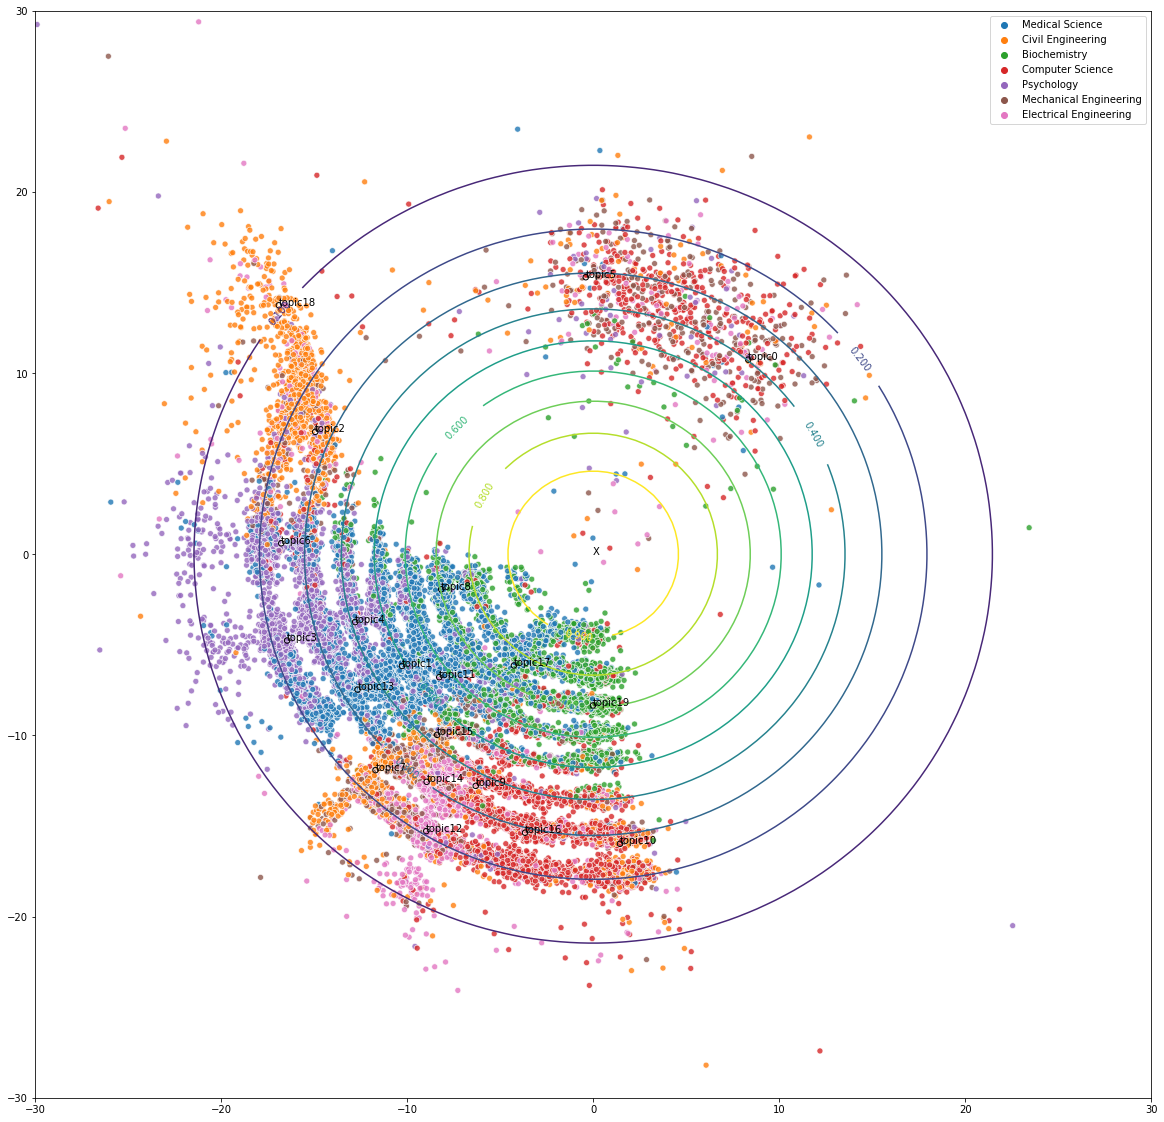

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)




#WordCloud



In [ ]:
!pip install wordcloud

In [ ]:
word_list=data_20news_preprocessed[j].split()
print(word_list)
flatten_all_words

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

comment_words = ''
topic_topword_comment = ''

for val in top_10_docs:
    comment_words += " ".join(val)+" "

for topword_topic in topword_topics_list:
    topic_topword_comment += " ".join(topword_topic)+" "

wordcloud_top10_docs = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

wordcloud_topword_topics = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(topic_topword_comment)

f = plt.figure(1,figsize = (8, 8))
plt.title('Words in Top Relevant 10 Docs')
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_top10_docs)
g = plt.figure(2,figsize = (8, 8))
plt.title("Top Words in k topics")
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_topword_topics)
plt.show()

#Archive

In [ ]:
import plotly.graph_objects as go
epochs=1000
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

plot_loss(x_arr,'KLD')
plot_loss(recon_arr,'Recon_loss')
plot_loss(neg_log_rscore_arr,'RScore')

In [ ]:
plt.hist(x=all_rscores.data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores

In [ ]:
plt.hist(x=normalized_all_rscores)
# print(normalized_all_rscores)
np.max(normalized_all_rscores.flatten())

In [ ]:
# with open('neg_log_rscore_arr.txt', 'w') as filehandle:
#     for listitem in neg_log_rscore_arr:
#         filehandle.write('%s\n' % listitem)

In [ ]:
all_words_in_docs=[]

def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words])
  return word_list

all_words_in_docs = doc_to_words(data_preprocessed)

In [ ]:
# data_20news_embedded = []
# for word in all_words_in_docs:
#   for w in word:
#     try:
#       type(word2vec_model[w])=='numpy.ndarray'
#     except KeyError:
#       word.remove(w)
#   data_20news_embedded.append(' '.join(word))
# # data_20news_embedded

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
flatten_all_words = flatten_list(all_words_in_docs)
# # flatten_embedded = flatten_list(data_20news_embedded)
# # flatten_embedded

In [ ]:
# len(set(flatten_all_words))

In [ ]:
count=0
embeddings = {}

for f in flatten_all_words:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    count = count+1
print( count / len(flatten_all_words)*100)

0.0


In [ ]:
save_obj(embeddings,'embeddings_arXiv')

In [ ]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is C4B9-6B1E

 Directory of C:\Users\sanuj

09/07/2020  01:49 PM    <DIR>          .
09/07/2020  01:49 PM    <DIR>          ..
03/12/2020  12:45 PM    <DIR>          .3T
08/31/2019  11:54 AM    <DIR>          .anaconda
07/04/2020  08:45 PM    <DIR>          .android
05/25/2020  10:10 AM    <DIR>          .atom
01/27/2020  04:33 PM                58 .bash_history
05/23/2020  09:14 PM    <DIR>          .cisco
08/27/2020  10:18 AM    <DIR>          .conda
08/27/2020  09:52 AM                60 .condarc
05/05/2020  12:39 PM    <DIR>          .config
03/12/2020  04:43 PM               256 .dbshell
02/01/2020  07:17 PM    <DIR>          .eclipse
01/26/2020  04:20 PM               200 .gitconfig
11/30/2019  05:13 PM    <DIR>          .Icecream Screen Recorder
11/28/2019  07:28 PM    <DIR>          .idlerc
09/01/2019  05:42 PM    <DIR>          .ipynb_checkpoints
08/31/2019  11:56 AM    <DIR>          .ipython
08/14/2020  12:53 PM    <DIR>

> Keyword search in corpus: Returns docs with matching keywords


In [ ]:
matching = [s for s in data_20news_preprocessed if " sport " in s]
matching


# Google Pre-trained Model & Word2Vec | Data preprocessing



In [ ]:
# !wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
# start=time()
# !gunzip GoogleNews-vectors-negative300.bin.gz
# print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
from gensim import models
word2vec_model = models.KeyedVectors.load_word2vec_format(
    'C:/Users/sanuj/Documents/FoTo/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
# print('Cell took %.2f seconds to run.' % (time() - start))

C:\Users\sanuj\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
import re
data_read = open("C:/Users/sanuj/Documents/FoTo/data/arXiv/text.txt", "r",encoding="utf8")
targets_read = open("C:/Users/sanuj/Documents/FoTo/data/arXiv/labels.txt", "r",encoding="utf8")
data = data_read.readlines()
targets = targets_read.readlines()
data_new = [d.strip("_PAPER_") for d in data]
targets_new = [d.strip("_PAPER_") for d in targets]
data_nenw = [re.sub(r'\d+_ ', '',d) for d in data_new]
targets_nenw = [re.sub(r'\d+_ ', '',d) for d in targets_new]
targets_final = [d.split()[0] for d in targets_nenw]

In [ ]:
len(targets_final) , len(data_nenw)

(840218, 840218)

In [ ]:



import gc
gc.collect()

44

In [ ]:
data_preprocessed = []
data_labels = []

for i in range(len(data_WoS)):
  doc = preprocessing_nonstem(data[i],word2vec_model)
  if(doc!=''):
    data_preprocessed.append(doc)
    data_labels.append(targets_final[i])

In [ ]:
save_obj(data_preprocessed,'data_arXiv_preprocessed')
save_obj(data_labels,'data_arXiv_labels')